In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#tic = sns.load_dataset('titanic')
#tic.head() 

In [3]:
tic = pd.read_csv('train.csv')
tic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
tic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
def deteksi(a):
    Age, Sex = a
    if Age < 16:
        return 'child'
    else:
        return Sex

tic['kat_penumpang'] = tic[['Age', 'Sex']].apply(deteksi, axis=1)
tic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,kat_penumpang
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [6]:
tic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  kat_penumpang  891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [7]:
tic['Survived'].value_counts() 

0    549
1    342
Name: Survived, dtype: int64

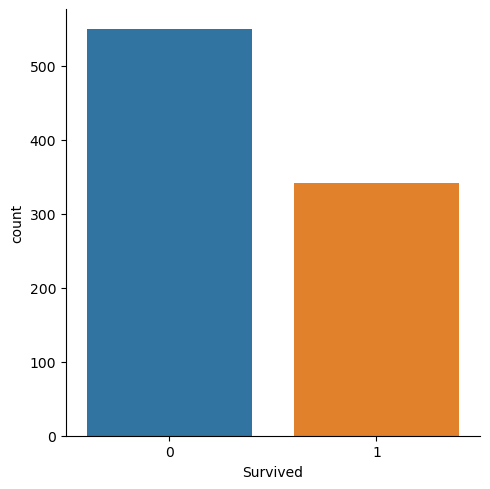

In [8]:
sns.catplot(x='Survived', kind='count', data=tic)

Perbandingan Jumlah penumpang yang selamat dan tidak:
>- Tidak selamat : 549
>- Selamat : 342

In [9]:
tic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
tic.groupby('Sex')[['Survived']].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
dtype: int64

In [11]:
x=sns.countplot(tic['Sex'], hue=tic['Survived'])
x.bar_label(x.containers[0])
x.bar_label(x.containers[1])
plt.title("Perbandingan jumlah penumpang selamat dan tidak berdasarkan gender")

Text(0.5, 1.0, 'Perbandingan jumlah penumpang selamat dan tidak berdasarkan gender')

Penumpang yang tidak selamat paling besar berjenis kelamin pria

In [12]:
tic['kat_penumpang'].value_counts() 

male      537
female    271
child      83
Name: kat_penumpang, dtype: int64

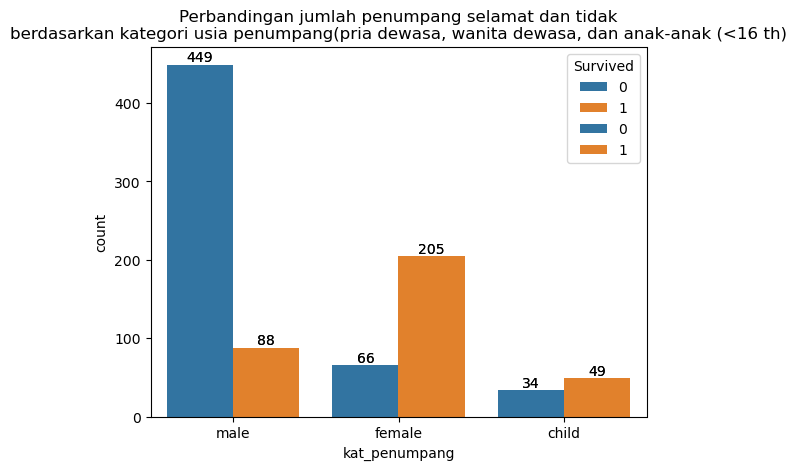

In [25]:
x = sns.countplot(tic['kat_penumpang'], hue=tic['Survived'])
x.bar_label(x.containers[0])
x.bar_label(x.containers[1])
plt.title('''Perbandingan jumlah penumpang selamat dan tidak
berdasarkan kategori usia penumpang(pria dewasa, wanita dewasa, dan anak-anak (<16 th)''')
plt.show()

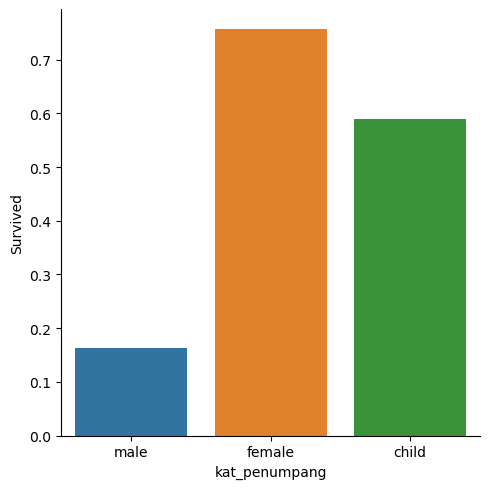

In [14]:
sns.catplot(x='kat_penumpang',y='Survived',kind='bar', data=tic, ci=None)
plt.show()

In [15]:
tic['Pclass'].value_counts() 

3    491
1    216
2    184
Name: Pclass, dtype: int64

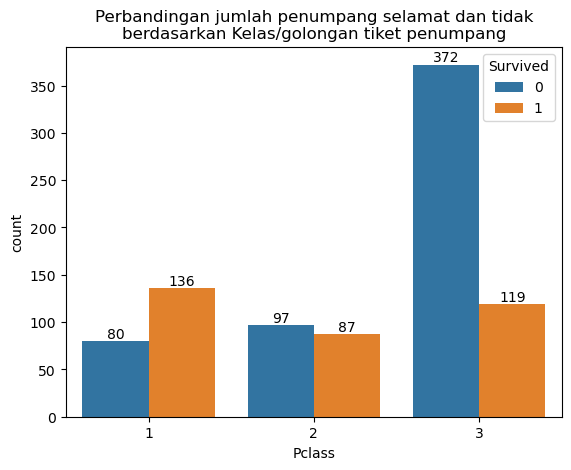

In [16]:
x=sns.countplot(tic['Pclass'], hue=tic['Survived'])
x.bar_label(x.containers[0])
x.bar_label(x.containers[1])
plt.title("Perbandingan jumlah penumpang selamat dan tidak\nberdasarkan Kelas/golongan tiket penumpang")
plt.show()

In [17]:
tic.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


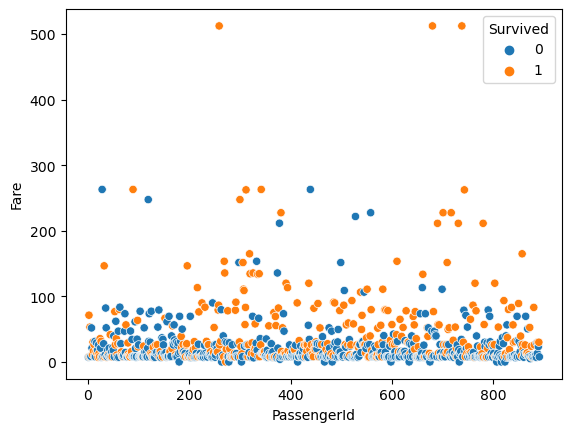

In [23]:
sns.scatterplot(data = tic, x = "PassengerId", y = "Fare", hue = "Survived") #size = "Freedom")
plt.show()

Sebagian besar penumpang membeli tiket dengan tarif di bawah 100 pounds

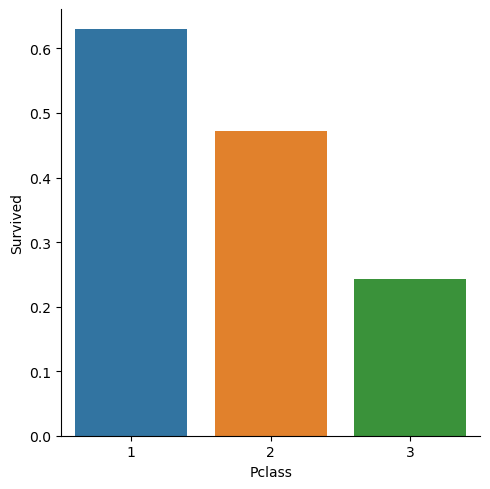

In [18]:
sns.catplot(x='Pclass',y='Survived',kind='bar', data=tic, ci=None)
plt.show()

In [19]:
tic['Embarked'].value_counts() 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
x = sns.countplot(tic['Embarked'], hue=tic['Survived'])
x.bar_label(x.containers[0])
x.bar_label(x.containers[1])
plt.title('Embarked')

Text(0.5, 1.0, 'Embarked')

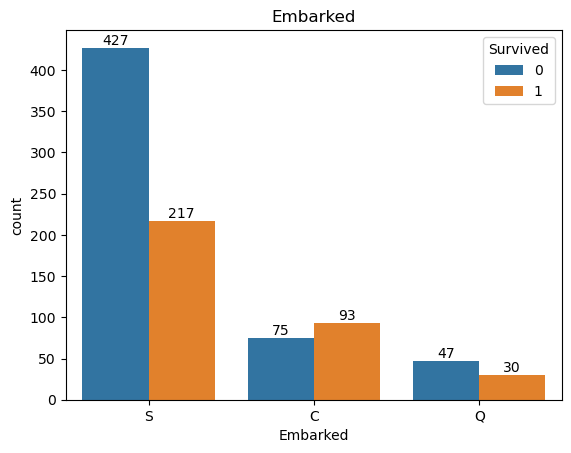

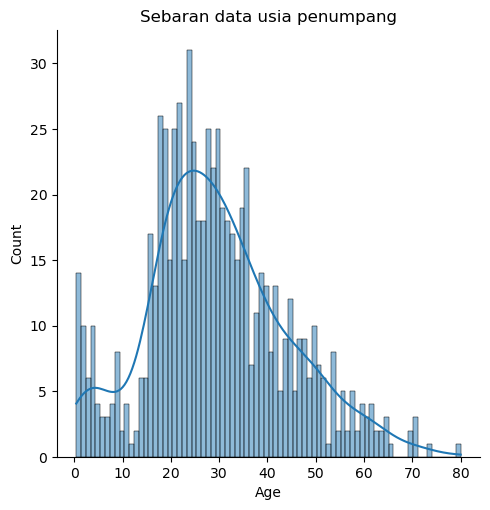

In [21]:
sns.displot(tic['Age'],kde=True,bins=80)
plt.title('Sebaran data usia penumpang')
plt.show()

## -------------------------------------------- ============== --------------------------------------------------